In [18]:
%matplotlib inline

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import sklearn
from sklearn.manifold import TSNE
                     

# Quelques représentations de chiffres manuscrits

## Données brutes

Le fichier `x.txt` contient les données brutes.
Elle correspond à la représentation des chiffres manuscrits en entrée du réseau.
Chaque ligne du fichier correspond à l'image binaire 16x16 d'un chiffre manuscrit.
Ce fichier est composée de 480 chiffres codés en binaire (±1).
Comme chaque «bitmap» binaire 16x16 a été transformée en un vecteur de dimension 256 le fichier contient ainsi une matrice 256x480. 
Cela signifie que chaque «bitmap» binaire correspond à une colonne de la matrice du fichier `x.txt`.

In [20]:
x = np.loadtxt("x.txt")

On peut maintenant déterminer le nombre des images et leur taille.

In [21]:
nombreDImages=x.shape[1]
tailleImage= int(np.sqrt(x.shape[0]))

Le fichier `t.txt` contient les sorties désirées qui sont associées à chaque "chiffre manuscrit" (i.e. ligne) de `x.txt` dans le même ordre. 
Chaque réponse désirée est constituée d’un vecteur colonne de longueur 10, rempli de -1 partout sauf à la position dont l’indice correspond au chiffre manuscrit. 
À cette position là, le composant du vecteur vaut +1. 
L’ensemble de tous ces vecteurs est organisé dans la matrice sous forme d’une matrice 10x480 stockée dans le fichier `t.txt`.

In [22]:
t = np.loadtxt("t.txt") 
t_label_num = np.where(t==1)[0]
class_label = ['zero','un','deux','trois','quatre','cinq','six','sept','huit','neuf']
t_label_str = [ class_label[i] for i in t_label_num]

print("Quelques colonnes de t.txt:\n",t[:,:3])

Quelques colonnes de t.txt:
 [[ 1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]]


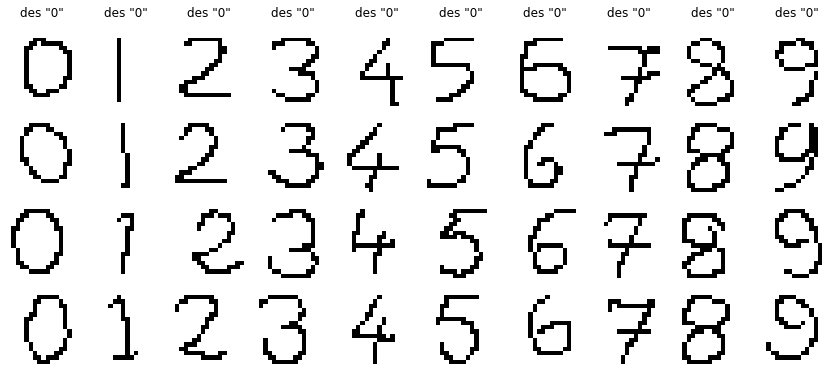

In [23]:
gs1 = gridspec.GridSpec(4, 10)
gs1.update(wspace=0.025, hspace=0.25) # set the spacing between axes. 

plt.figure(figsize=(10+5,4+2))
for i in range(min(40,nombreDImages)):
    plt.subplot(gs1[i])
    plt.imshow(x[:,i].reshape((tailleImage,tailleImage)),cmap='binary')
    plt.axis('off')
    if i < 10:
        plt.gca().set_title('des "{}"\n'.format(t_label_num[i]))
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.gca().set_aspect('equal')
#plt.tight_layout()

## Quelques représentations alternatives

#### Description des codages utilisés :
 - HX : histogramme des projections du chiffre sur l’axe des x 
   (dans chaque colonne on calcule le nombre de pixels noir - le nombre de pixels blancs).  
   HX est donc un vecteur de 16 composantes.
 - HY : histogramme des projections du chiffre sur l’axe des y 
   (dans chaque ligne on calcule le nombre de pixels noir - le nombre de pixels blancs).  
   HY est aussi un vecteur de 16 composantes.
 - PH : profil haut - pour chaque colonne, on code la coordonnée de la première transition 
   blanc/noir en partant du haut.  
   PH est un vecteur de 16 composantes. 
 - PB : profil bas - pour chaque colonne, on code la coordonnée de la première transition 
   blanc/noir en partant du bas.  
   PB est un vecteur de 16 composantes.
 - PG : profil gauche - pour chaque ligne, on code la coordonnée de la première transition 
   blanc/noir en partant de la gauche.  
   PG est un vecteur de 16 composantes.
 - PD : profil droit - pour chaque ligne, on code la coordonnée de la première transition 
   blanc/noir en partant de la droite.  
   PD est un vecteur de 16 composantes.

(Il est à noter que les coordonnées sont indicées de la gauche vers la droite en ligne et de haut en
bas pour les colonnes)

In [24]:
i=7
image = x[:,i].reshape((tailleImage,tailleImage)) 
hx = np.sum(image==1,axis=0)
hy = np.sum(image==1,axis=1)
ph = np.array([ image[:,i].tolist().index(1) if np.any(image[:,i]==1) else len(image[:,i])-1 for i in range(image.shape[1])])
pb = np.array([ image[::-1,i].tolist().index(1) if np.any(image[:,i]==1) else len(image[:,i])-1 for i in range(image.shape[1])])
pg = np.array([ image[i,:].tolist().index(1) if np.any(image[i,:]==1) else len(image[i,:])-1 for i in range(image.shape[0])])
pd = np.array([ image[i,::-1].tolist().index(1) if np.any(image[i,:]==1) else len(image[i,:])-1 for i in range(image.shape[0])])
print('hx :',hx)
print('hy :',hy)
print('ph :',ph)
print('pb :',pb)
print('pd :',pd)
print('pg :',pg)

hx : [0 0 0 1 1 1 2 4 4 5 6 5 4 3 3 0]
hy : [ 0  0 11  5  1  1  1  1  4  7  2  1  1  1  2  1]
ph : [15 15 15  2  2  2  2  2  2  2  2  3  2  2  2 15]
pb : [15 15 15 13 13 13  6  0  1  3  5  6  6  7  7 15]
pd : [15 15  1  1  4  4  4  5  1  3  5  6  6  7  7  8]
pg : [15 15  3 10 11 11 11 10 10  6  9  9  9  8  7  7]


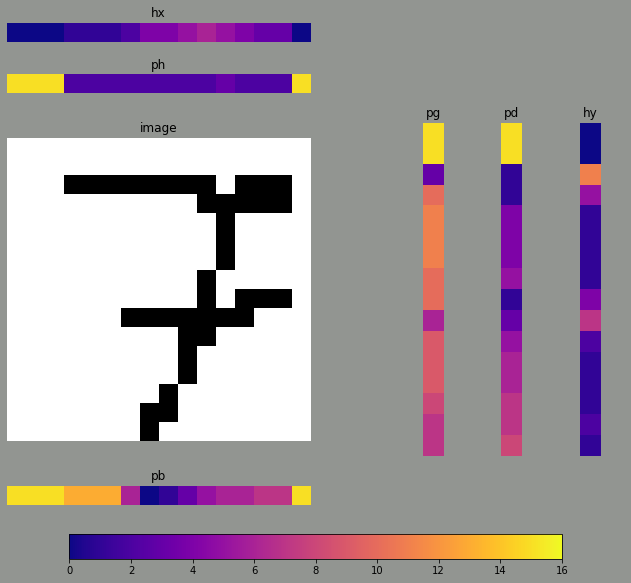

In [25]:
#cmap = matplotlib.cm.hot
#cmap = matplotlib.cm.jet
cmap = matplotlib.cm.plasma
norm = matplotlib.cm.colors.Normalize(vmin=1, vmax=tailleImage)
colors = cmap(np.linspace(0,1,tailleImage))


fig = plt.figure(figsize=(9,8))
fig.patch.set_facecolor('xkcd:grey')
#fig.patch.set_facecolor('xkcd:light grey')
gs = GridSpec(11, 8, figure=fig)
#
ax0 = fig.add_subplot(gs[0, :-4])
im = plt.imshow(hx[None,:],cmap=cmap,vmin=0,vmax=tailleImage)
plt.title('hx')
plt.axis('off')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
#
ax1 = fig.add_subplot(gs[1, :-4])
plt.imshow(ph[None,:],cmap=cmap,vmin=0,vmax=tailleImage)
plt.title('ph')
plt.axis('off')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
#
ax2 = fig.add_subplot(gs[2:-2, :-4])
plt.title('image')
plt.imshow(image,cmap='binary')
plt.axis('off')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().set_aspect('equal')
#
ax3 = fig.add_subplot(gs[-2, :-4])
plt.title('pb')
plt.imshow(pb[None,:],cmap=cmap,vmin=0,vmax=tailleImage)
plt.axis('off')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
#
ax4 = fig.add_subplot(gs[2:-2, -1])
plt.title('hy')
plt.imshow(hy[:,None],cmap=cmap,vmin=0,vmax=tailleImage)
plt.axis('off')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
#
ax5 = fig.add_subplot(gs[2:-2, -2])
plt.title('pd')
plt.imshow(pd[:,None],cmap=cmap,vmin=0,vmax=tailleImage)
plt.axis('off')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
#
ax6 = fig.add_subplot(gs[2:-2, -3])
plt.title('pg')
plt.imshow(pg[:,None],cmap=cmap,vmin=0,vmax=tailleImage)
plt.axis('off')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
#
ax7 = fig.add_subplot(gs[-1, ::])
plt.axis('off')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
fig.colorbar(im,  ax=ax7, orientation='horizontal',fraction=1, pad=0.04)

plt.tight_layout()


Ces 6 conventions de codage, peuvent être combinés pour former différents fichiers d’apprentissage. Nous vous soumettons les différents cas suivants :  
1 : codage HX seul ; vecteur de 16 composantes. Fichier d’entrée : `hx.txt`  
2 : codage HX,HY ; vecteur de 32 composantes. Fichier d’entrée : `hx_hy.txt`  
3 : codage PG,PD ; vecteur de 32 composantes. Fichier d’entrée : `pg_pd.txt`  
4 : codage HX,HY,PG,PD ; vecteur de 64 composantes. Fichier d’entrée : `hx_hy_pg_pd.txt`  
5 : codage PB,PH ; vecteur de 32 composantes. Fichier d’entrée : `pb_ph.txt`  
6 : codage HX,HY,PB,PH ; vecteur de 64 composantes. Fichier d’entrée : `hx_hy_pb_ph.txt`  

On précise que toutes les données de ces fichiers ont été de surcroît « normalisées » dans l’intervalle \[-1, 1\] , SAUF `hx.txt`

In [26]:
# les différentes avriantes de codages associées à la représentation du nombre
hx = np.loadtxt("hx.txt")
hx_hy = np.loadtxt("hx_hy.txt")
pb_ph = np.loadtxt("pb_ph.txt")
pg_pd = np.loadtxt("pg_pd.txt")
hx_hy_pb_ph = np.loadtxt("hx_hy_pb_ph.txt")
hx_hy_pg_pd = np.loadtxt("hx_hy_pg_pd.txt")

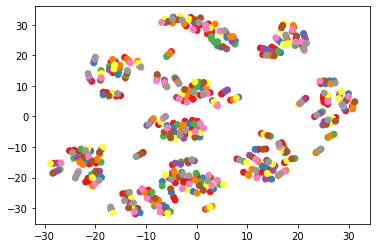

In [27]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(hx_hy_pg_pd.T)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=plt.cm.Set1(t_label_num / 10.))

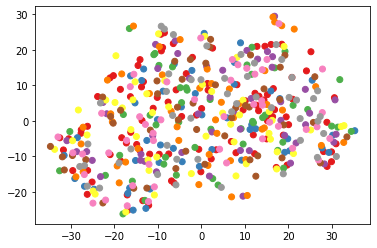

In [28]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(x.T)

plt.scatter(X_tsne[:,0],X_tsne[:,1],c=plt.cm.Set1(t_label_num / 10.))
            #c=t_label_num)

***
**On est jamais mieux servi que par soi-même.**  
**If you want something done right, do it yourself.**

[scipy](https://www.scipy.org/) - [pandas](https://pandas.pydata.org/) - [Numpy and Scipy](https://docs.scipy.org/doc/) - [matplotlib](https://matplotlib.org/) - [scikit-learn](http://scikit-learn.org/stable/) - [seaborn](https://seaborn.pydata.org/)